##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

 8192/29515 [=======>......................] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 0s

 4202496/26421880 [===>..........................] - ETA: 0s

21200896/26421880 [=======================>......] - ETA: 0s

26427392/26421880 [==============================] - 0s 0us/step


8192/5148 [===============================================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

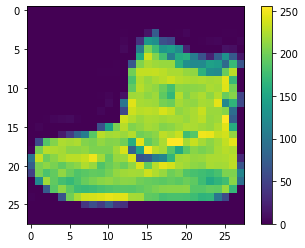

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

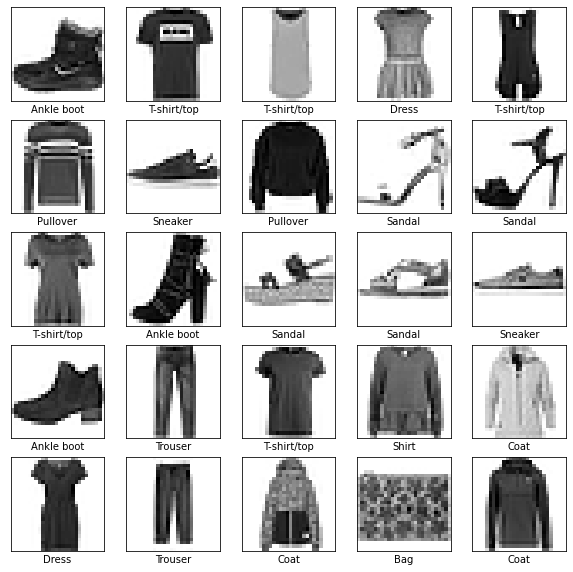

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 2.3938 - accuracy: 0.1875

  38/1875 [..............................] - ETA: 2s - loss: 1.2366 - accuracy: 0.5888

  77/1875 [>.............................] - ETA: 2s - loss: 1.0045 - accuracy: 0.6656

 117/1875 [>.............................] - ETA: 2s - loss: 0.9086 - accuracy: 0.6870

 154/1875 [=>............................] - ETA: 2s - loss: 0.8455 - accuracy: 0.7119

 191/1875 [==>...........................] - ETA: 2s - loss: 0.7964 - accuracy: 0.7294

 229/1875 [==>...........................] - ETA: 2s - loss: 0.7610 - accuracy: 0.7421

 268/1875 [===>..........................] - ETA: 2s - loss: 0.7323 - accuracy: 0.7500

 308/1875 [===>..........................] - ETA: 2s - loss: 0.7085 - accuracy: 0.7560

 348/1875 [====>.........................] - ETA: 2s - loss: 0.6897 - accuracy: 0.7610

 386/1875 [=====>........................] - ETA: 1s - loss: 0.6730 - accuracy: 0.7668

 425/1875 [=====>........................] - ETA: 1s - loss: 0.6562 - accuracy: 0.7728

 465/1875 [======>.......................] - ETA: 1s - loss: 0.6465 - accuracy: 0.7767

 505/1875 [=======>......................] - ETA: 1s - loss: 0.6373 - accuracy: 0.7794

 545/1875 [=======>......................] - ETA: 1s - loss: 0.6257 - accuracy: 0.7831

 585/1875 [========>.....................] - ETA: 1s - loss: 0.6162 - accuracy: 0.7869

 625/1875 [=========>....................] - ETA: 1s - loss: 0.6076 - accuracy: 0.7891

 666/1875 [=========>....................] - ETA: 1s - loss: 0.5993 - accuracy: 0.7930

 706/1875 [==========>...................] - ETA: 1s - loss: 0.5922 - accuracy: 0.7955

 746/1875 [==========>...................] - ETA: 1s - loss: 0.5879 - accuracy: 0.7971

 786/1875 [===========>..................] - ETA: 1s - loss: 0.5821 - accuracy: 0.7990

 826/1875 [============>.................] - ETA: 1s - loss: 0.5759 - accuracy: 0.8008

 866/1875 [============>.................] - ETA: 1s - loss: 0.5701 - accuracy: 0.8026

 906/1875 [=============>................] - ETA: 1s - loss: 0.5668 - accuracy: 0.8040

 946/1875 [==============>...............] - ETA: 1s - loss: 0.5609 - accuracy: 0.8061

 984/1875 [==============>...............] - ETA: 1s - loss: 0.5566 - accuracy: 0.8074

1025/1875 [===============>..............] - ETA: 1s - loss: 0.5532 - accuracy: 0.8085

1065/1875 [================>.............] - ETA: 1s - loss: 0.5490 - accuracy: 0.8098

1106/1875 [================>.............] - ETA: 0s - loss: 0.5439 - accuracy: 0.8119

1145/1875 [=================>............] - ETA: 0s - loss: 0.5406 - accuracy: 0.8126

1185/1875 [=================>............] - ETA: 0s - loss: 0.5387 - accuracy: 0.8132

1225/1875 [==================>...........] - ETA: 0s - loss: 0.5356 - accuracy: 0.8140

1265/1875 [===================>..........] - ETA: 0s - loss: 0.5312 - accuracy: 0.8154

1306/1875 [===================>..........] - ETA: 0s - loss: 0.5286 - accuracy: 0.8160

1344/1875 [====================>.........] - ETA: 0s - loss: 0.5271 - accuracy: 0.8162

1382/1875 [=====================>........] - ETA: 0s - loss: 0.5245 - accuracy: 0.8169

1421/1875 [=====================>........] - ETA: 0s - loss: 0.5221 - accuracy: 0.8178

1460/1875 [======================>.......] - ETA: 0s - loss: 0.5207 - accuracy: 0.8181

1501/1875 [=======================>......] - ETA: 0s - loss: 0.5184 - accuracy: 0.8188

1541/1875 [=======================>......] - ETA: 0s - loss: 0.5172 - accuracy: 0.8191

1581/1875 [========================>.....] - ETA: 0s - loss: 0.5145 - accuracy: 0.8199

1621/1875 [========================>.....] - ETA: 0s - loss: 0.5119 - accuracy: 0.8207

1660/1875 [=========================>....] - ETA: 0s - loss: 0.5083 - accuracy: 0.8219

1697/1875 [==========================>...] - ETA: 0s - loss: 0.5069 - accuracy: 0.8223

1736/1875 [==========================>...] - ETA: 0s - loss: 0.5047 - accuracy: 0.8231

1774/1875 [===========================>..] - ETA: 0s - loss: 0.5038 - accuracy: 0.8234

1814/1875 [============================>.] - ETA: 0s - loss: 0.5017 - accuracy: 0.8241

1854/1875 [============================>.] - ETA: 0s - loss: 0.4982 - accuracy: 0.8252

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4973 - accuracy: 0.8255


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4700 - accuracy: 0.7500

  39/1875 [..............................] - ETA: 2s - loss: 0.3631 - accuracy: 0.8686

  78/1875 [>.............................] - ETA: 2s - loss: 0.3874 - accuracy: 0.8594

 119/1875 [>.............................] - ETA: 2s - loss: 0.3886 - accuracy: 0.8566

 158/1875 [=>............................] - ETA: 2s - loss: 0.3850 - accuracy: 0.8600

 198/1875 [==>...........................] - ETA: 2s - loss: 0.3887 - accuracy: 0.8580

 238/1875 [==>...........................] - ETA: 2s - loss: 0.3870 - accuracy: 0.8583

 277/1875 [===>..........................] - ETA: 2s - loss: 0.3892 - accuracy: 0.8575

 316/1875 [====>.........................] - ETA: 1s - loss: 0.3894 - accuracy: 0.8571

 354/1875 [====>.........................] - ETA: 1s - loss: 0.3886 - accuracy: 0.8583

 392/1875 [=====>........................] - ETA: 1s - loss: 0.3890 - accuracy: 0.8593

 432/1875 [=====>........................] - ETA: 1s - loss: 0.3884 - accuracy: 0.8593

 473/1875 [======>.......................] - ETA: 1s - loss: 0.3882 - accuracy: 0.8595

 513/1875 [=======>......................] - ETA: 1s - loss: 0.3842 - accuracy: 0.8615

 553/1875 [=======>......................] - ETA: 1s - loss: 0.3843 - accuracy: 0.8619

 594/1875 [========>.....................] - ETA: 1s - loss: 0.3861 - accuracy: 0.8612

 632/1875 [=========>....................] - ETA: 1s - loss: 0.3846 - accuracy: 0.8612

 670/1875 [=========>....................] - ETA: 1s - loss: 0.3853 - accuracy: 0.8611

 709/1875 [==========>...................] - ETA: 1s - loss: 0.3876 - accuracy: 0.8599

 748/1875 [==========>...................] - ETA: 1s - loss: 0.3859 - accuracy: 0.8604

 789/1875 [===========>..................] - ETA: 1s - loss: 0.3865 - accuracy: 0.8605

 828/1875 [============>.................] - ETA: 1s - loss: 0.3867 - accuracy: 0.8598

 868/1875 [============>.................] - ETA: 1s - loss: 0.3864 - accuracy: 0.8604

 909/1875 [=============>................] - ETA: 1s - loss: 0.3850 - accuracy: 0.8608

 949/1875 [==============>...............] - ETA: 1s - loss: 0.3848 - accuracy: 0.8609

 990/1875 [==============>...............] - ETA: 1s - loss: 0.3843 - accuracy: 0.8616

1029/1875 [===============>..............] - ETA: 1s - loss: 0.3841 - accuracy: 0.8612

1068/1875 [================>.............] - ETA: 1s - loss: 0.3849 - accuracy: 0.8608

1106/1875 [================>.............] - ETA: 0s - loss: 0.3840 - accuracy: 0.8610

1144/1875 [=================>............] - ETA: 0s - loss: 0.3842 - accuracy: 0.8609

1183/1875 [=================>............] - ETA: 0s - loss: 0.3830 - accuracy: 0.8613

1223/1875 [==================>...........] - ETA: 0s - loss: 0.3826 - accuracy: 0.8617

1263/1875 [===================>..........] - ETA: 0s - loss: 0.3814 - accuracy: 0.8624

1301/1875 [===================>..........] - ETA: 0s - loss: 0.3815 - accuracy: 0.8622

1342/1875 [====================>.........] - ETA: 0s - loss: 0.3819 - accuracy: 0.8620

1381/1875 [=====================>........] - ETA: 0s - loss: 0.3809 - accuracy: 0.8625

1420/1875 [=====================>........] - ETA: 0s - loss: 0.3803 - accuracy: 0.8628

1458/1875 [======================>.......] - ETA: 0s - loss: 0.3801 - accuracy: 0.8628

1498/1875 [======================>.......] - ETA: 0s - loss: 0.3803 - accuracy: 0.8628

1537/1875 [=======================>......] - ETA: 0s - loss: 0.3795 - accuracy: 0.8630

1575/1875 [========================>.....] - ETA: 0s - loss: 0.3786 - accuracy: 0.8634

1615/1875 [========================>.....] - ETA: 0s - loss: 0.3770 - accuracy: 0.8638

1655/1875 [=========================>....] - ETA: 0s - loss: 0.3765 - accuracy: 0.8637

1695/1875 [==========================>...] - ETA: 0s - loss: 0.3756 - accuracy: 0.8641

1733/1875 [==========================>...] - ETA: 0s - loss: 0.3753 - accuracy: 0.8640

1772/1875 [===========================>..] - ETA: 0s - loss: 0.3746 - accuracy: 0.8644

1811/1875 [===========================>..] - ETA: 0s - loss: 0.3746 - accuracy: 0.8641

1850/1875 [============================>.] - ETA: 0s - loss: 0.3746 - accuracy: 0.8639

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3743 - accuracy: 0.8639


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2204 - accuracy: 0.9375

  41/1875 [..............................] - ETA: 2s - loss: 0.3799 - accuracy: 0.8727

  82/1875 [>.............................] - ETA: 2s - loss: 0.3485 - accuracy: 0.8780

 122/1875 [>.............................] - ETA: 2s - loss: 0.3403 - accuracy: 0.8794

 161/1875 [=>............................] - ETA: 2s - loss: 0.3457 - accuracy: 0.8771

 199/1875 [==>...........................] - ETA: 2s - loss: 0.3444 - accuracy: 0.8783

 237/1875 [==>...........................] - ETA: 2s - loss: 0.3433 - accuracy: 0.8776

 276/1875 [===>..........................] - ETA: 2s - loss: 0.3416 - accuracy: 0.8762

 316/1875 [====>.........................] - ETA: 2s - loss: 0.3382 - accuracy: 0.8776

 354/1875 [====>.........................] - ETA: 1s - loss: 0.3322 - accuracy: 0.8804

 395/1875 [=====>........................] - ETA: 1s - loss: 0.3284 - accuracy: 0.8812

 433/1875 [=====>........................] - ETA: 1s - loss: 0.3275 - accuracy: 0.8819

 472/1875 [======>.......................] - ETA: 1s - loss: 0.3301 - accuracy: 0.8815

 512/1875 [=======>......................] - ETA: 1s - loss: 0.3275 - accuracy: 0.8823

 551/1875 [=======>......................] - ETA: 1s - loss: 0.3297 - accuracy: 0.8817

 592/1875 [========>.....................] - ETA: 1s - loss: 0.3295 - accuracy: 0.8812

 633/1875 [=========>....................] - ETA: 1s - loss: 0.3294 - accuracy: 0.8806

 673/1875 [=========>....................] - ETA: 1s - loss: 0.3291 - accuracy: 0.8809

 714/1875 [==========>...................] - ETA: 1s - loss: 0.3290 - accuracy: 0.8807

 754/1875 [===========>..................] - ETA: 1s - loss: 0.3304 - accuracy: 0.8801

 795/1875 [===========>..................] - ETA: 1s - loss: 0.3325 - accuracy: 0.8798

 836/1875 [============>.................] - ETA: 1s - loss: 0.3336 - accuracy: 0.8792

 876/1875 [=============>................] - ETA: 1s - loss: 0.3338 - accuracy: 0.8793

 916/1875 [=============>................] - ETA: 1s - loss: 0.3350 - accuracy: 0.8792

 956/1875 [==============>...............] - ETA: 1s - loss: 0.3354 - accuracy: 0.8787

 994/1875 [==============>...............] - ETA: 1s - loss: 0.3363 - accuracy: 0.8783

1033/1875 [===============>..............] - ETA: 1s - loss: 0.3366 - accuracy: 0.8780

1074/1875 [================>.............] - ETA: 1s - loss: 0.3367 - accuracy: 0.8779

1115/1875 [================>.............] - ETA: 0s - loss: 0.3375 - accuracy: 0.8775

1155/1875 [=================>............] - ETA: 0s - loss: 0.3373 - accuracy: 0.8776

1195/1875 [==================>...........] - ETA: 0s - loss: 0.3358 - accuracy: 0.8781

1235/1875 [==================>...........] - ETA: 0s - loss: 0.3347 - accuracy: 0.8785

1274/1875 [===================>..........] - ETA: 0s - loss: 0.3359 - accuracy: 0.8782

1312/1875 [===================>..........] - ETA: 0s - loss: 0.3356 - accuracy: 0.8786

1351/1875 [====================>.........] - ETA: 0s - loss: 0.3360 - accuracy: 0.8785

1389/1875 [=====================>........] - ETA: 0s - loss: 0.3357 - accuracy: 0.8784

1429/1875 [=====================>........] - ETA: 0s - loss: 0.3357 - accuracy: 0.8782

1468/1875 [======================>.......] - ETA: 0s - loss: 0.3358 - accuracy: 0.8782

1506/1875 [=======================>......] - ETA: 0s - loss: 0.3362 - accuracy: 0.8781

1546/1875 [=======================>......] - ETA: 0s - loss: 0.3344 - accuracy: 0.8787

1587/1875 [========================>.....] - ETA: 0s - loss: 0.3343 - accuracy: 0.8785

1627/1875 [=========================>....] - ETA: 0s - loss: 0.3348 - accuracy: 0.8786

1666/1875 [=========================>....] - ETA: 0s - loss: 0.3342 - accuracy: 0.8786

1707/1875 [==========================>...] - ETA: 0s - loss: 0.3339 - accuracy: 0.8784

1746/1875 [==========================>...] - ETA: 0s - loss: 0.3345 - accuracy: 0.8783

1785/1875 [===========================>..] - ETA: 0s - loss: 0.3351 - accuracy: 0.8779

1823/1875 [============================>.] - ETA: 0s - loss: 0.3349 - accuracy: 0.8781

1862/1875 [============================>.] - ETA: 0s - loss: 0.3346 - accuracy: 0.8781

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3345 - accuracy: 0.8782


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2215 - accuracy: 0.9688

  40/1875 [..............................] - ETA: 2s - loss: 0.3207 - accuracy: 0.8906

  80/1875 [>.............................] - ETA: 2s - loss: 0.3082 - accuracy: 0.8914

 121/1875 [>.............................] - ETA: 2s - loss: 0.3081 - accuracy: 0.8913

 160/1875 [=>............................] - ETA: 2s - loss: 0.3119 - accuracy: 0.8908

 198/1875 [==>...........................] - ETA: 2s - loss: 0.3142 - accuracy: 0.8894

 237/1875 [==>...........................] - ETA: 2s - loss: 0.3174 - accuracy: 0.8878

 276/1875 [===>..........................] - ETA: 2s - loss: 0.3197 - accuracy: 0.8859

 315/1875 [====>.........................] - ETA: 2s - loss: 0.3192 - accuracy: 0.8858

 354/1875 [====>.........................] - ETA: 1s - loss: 0.3197 - accuracy: 0.8856

 393/1875 [=====>........................] - ETA: 1s - loss: 0.3217 - accuracy: 0.8853

 433/1875 [=====>........................] - ETA: 1s - loss: 0.3204 - accuracy: 0.8846

 474/1875 [======>.......................] - ETA: 1s - loss: 0.3178 - accuracy: 0.8855

 515/1875 [=======>......................] - ETA: 1s - loss: 0.3162 - accuracy: 0.8865

 556/1875 [=======>......................] - ETA: 1s - loss: 0.3178 - accuracy: 0.8862

 597/1875 [========>.....................] - ETA: 1s - loss: 0.3182 - accuracy: 0.8852

 638/1875 [=========>....................] - ETA: 1s - loss: 0.3189 - accuracy: 0.8843

 677/1875 [=========>....................] - ETA: 1s - loss: 0.3196 - accuracy: 0.8841

 715/1875 [==========>...................] - ETA: 1s - loss: 0.3173 - accuracy: 0.8852

 755/1875 [===========>..................] - ETA: 1s - loss: 0.3176 - accuracy: 0.8849

 796/1875 [===========>..................] - ETA: 1s - loss: 0.3177 - accuracy: 0.8847

 834/1875 [============>.................] - ETA: 1s - loss: 0.3160 - accuracy: 0.8856

 870/1875 [============>.................] - ETA: 1s - loss: 0.3153 - accuracy: 0.8855

 906/1875 [=============>................] - ETA: 1s - loss: 0.3141 - accuracy: 0.8861

 945/1875 [==============>...............] - ETA: 1s - loss: 0.3146 - accuracy: 0.8854

 983/1875 [==============>...............] - ETA: 1s - loss: 0.3144 - accuracy: 0.8850

1021/1875 [===============>..............] - ETA: 1s - loss: 0.3143 - accuracy: 0.8849

1059/1875 [===============>..............] - ETA: 1s - loss: 0.3145 - accuracy: 0.8847

1097/1875 [================>.............] - ETA: 1s - loss: 0.3152 - accuracy: 0.8848

1135/1875 [=================>............] - ETA: 0s - loss: 0.3138 - accuracy: 0.8851

1173/1875 [=================>............] - ETA: 0s - loss: 0.3124 - accuracy: 0.8859

1210/1875 [==================>...........] - ETA: 0s - loss: 0.3121 - accuracy: 0.8860

1250/1875 [===================>..........] - ETA: 0s - loss: 0.3114 - accuracy: 0.8863

1288/1875 [===================>..........] - ETA: 0s - loss: 0.3114 - accuracy: 0.8864

1329/1875 [====================>.........] - ETA: 0s - loss: 0.3122 - accuracy: 0.8860

1369/1875 [====================>.........] - ETA: 0s - loss: 0.3133 - accuracy: 0.8857

1409/1875 [=====================>........] - ETA: 0s - loss: 0.3131 - accuracy: 0.8858

1449/1875 [======================>.......] - ETA: 0s - loss: 0.3124 - accuracy: 0.8861

1487/1875 [======================>.......] - ETA: 0s - loss: 0.3124 - accuracy: 0.8861

1524/1875 [=======================>......] - ETA: 0s - loss: 0.3126 - accuracy: 0.8860

1563/1875 [========================>.....] - ETA: 0s - loss: 0.3119 - accuracy: 0.8862

1602/1875 [========================>.....] - ETA: 0s - loss: 0.3116 - accuracy: 0.8862

1643/1875 [=========================>....] - ETA: 0s - loss: 0.3117 - accuracy: 0.8863

1683/1875 [=========================>....] - ETA: 0s - loss: 0.3115 - accuracy: 0.8862

1722/1875 [==========================>...] - ETA: 0s - loss: 0.3116 - accuracy: 0.8862

1760/1875 [===========================>..] - ETA: 0s - loss: 0.3115 - accuracy: 0.8862

1799/1875 [===========================>..] - ETA: 0s - loss: 0.3122 - accuracy: 0.8861

1838/1875 [============================>.] - ETA: 0s - loss: 0.3125 - accuracy: 0.8860

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3128 - accuracy: 0.8860


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.6834 - accuracy: 0.8438

  40/1875 [..............................] - ETA: 2s - loss: 0.3114 - accuracy: 0.8836

  79/1875 [>.............................] - ETA: 2s - loss: 0.2869 - accuracy: 0.8877

 118/1875 [>.............................] - ETA: 2s - loss: 0.2891 - accuracy: 0.8888

 157/1875 [=>............................] - ETA: 2s - loss: 0.2844 - accuracy: 0.8921

 196/1875 [==>...........................] - ETA: 2s - loss: 0.2818 - accuracy: 0.8938

 235/1875 [==>...........................] - ETA: 2s - loss: 0.2856 - accuracy: 0.8919

 275/1875 [===>..........................] - ETA: 2s - loss: 0.2900 - accuracy: 0.8923

 316/1875 [====>.........................] - ETA: 1s - loss: 0.2917 - accuracy: 0.8912

 357/1875 [====>.........................] - ETA: 1s - loss: 0.2914 - accuracy: 0.8925

 398/1875 [=====>........................] - ETA: 1s - loss: 0.2909 - accuracy: 0.8933

 439/1875 [======>.......................] - ETA: 1s - loss: 0.2921 - accuracy: 0.8925

 479/1875 [======>.......................] - ETA: 1s - loss: 0.2936 - accuracy: 0.8912

 519/1875 [=======>......................] - ETA: 1s - loss: 0.2940 - accuracy: 0.8913

 559/1875 [=======>......................] - ETA: 1s - loss: 0.2946 - accuracy: 0.8911

 599/1875 [========>.....................] - ETA: 1s - loss: 0.2941 - accuracy: 0.8915

 639/1875 [=========>....................] - ETA: 1s - loss: 0.2957 - accuracy: 0.8911

 678/1875 [=========>....................] - ETA: 1s - loss: 0.2962 - accuracy: 0.8905

 716/1875 [==========>...................] - ETA: 1s - loss: 0.2965 - accuracy: 0.8905

 755/1875 [===========>..................] - ETA: 1s - loss: 0.2952 - accuracy: 0.8909

 794/1875 [===========>..................] - ETA: 1s - loss: 0.2960 - accuracy: 0.8906

 832/1875 [============>.................] - ETA: 1s - loss: 0.2938 - accuracy: 0.8913

 870/1875 [============>.................] - ETA: 1s - loss: 0.2939 - accuracy: 0.8916

 909/1875 [=============>................] - ETA: 1s - loss: 0.2947 - accuracy: 0.8911

 948/1875 [==============>...............] - ETA: 1s - loss: 0.2951 - accuracy: 0.8912

 988/1875 [==============>...............] - ETA: 1s - loss: 0.2971 - accuracy: 0.8907

1028/1875 [===============>..............] - ETA: 1s - loss: 0.2963 - accuracy: 0.8912

1068/1875 [================>.............] - ETA: 1s - loss: 0.2962 - accuracy: 0.8909

1109/1875 [================>.............] - ETA: 0s - loss: 0.2957 - accuracy: 0.8911

1148/1875 [=================>............] - ETA: 0s - loss: 0.2955 - accuracy: 0.8910

1187/1875 [=================>............] - ETA: 0s - loss: 0.2961 - accuracy: 0.8907

1227/1875 [==================>...........] - ETA: 0s - loss: 0.2957 - accuracy: 0.8907

1267/1875 [===================>..........] - ETA: 0s - loss: 0.2963 - accuracy: 0.8910

1306/1875 [===================>..........] - ETA: 0s - loss: 0.2959 - accuracy: 0.8912

1346/1875 [====================>.........] - ETA: 0s - loss: 0.2953 - accuracy: 0.8914

1385/1875 [=====================>........] - ETA: 0s - loss: 0.2947 - accuracy: 0.8917

1425/1875 [=====================>........] - ETA: 0s - loss: 0.2942 - accuracy: 0.8919

1464/1875 [======================>.......] - ETA: 0s - loss: 0.2946 - accuracy: 0.8915

1505/1875 [=======================>......] - ETA: 0s - loss: 0.2945 - accuracy: 0.8918

1545/1875 [=======================>......] - ETA: 0s - loss: 0.2951 - accuracy: 0.8917

1586/1875 [========================>.....] - ETA: 0s - loss: 0.2951 - accuracy: 0.8918

1626/1875 [=========================>....] - ETA: 0s - loss: 0.2940 - accuracy: 0.8924

1664/1875 [=========================>....] - ETA: 0s - loss: 0.2934 - accuracy: 0.8926

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2940 - accuracy: 0.8925

1743/1875 [==========================>...] - ETA: 0s - loss: 0.2936 - accuracy: 0.8926

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2936 - accuracy: 0.8924

1822/1875 [============================>.] - ETA: 0s - loss: 0.2933 - accuracy: 0.8925

1863/1875 [============================>.] - ETA: 0s - loss: 0.2933 - accuracy: 0.8925

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2937 - accuracy: 0.8925


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4076 - accuracy: 0.8438

  41/1875 [..............................] - ETA: 2s - loss: 0.2849 - accuracy: 0.8918

  83/1875 [>.............................] - ETA: 2s - loss: 0.2807 - accuracy: 0.8938

 124/1875 [>.............................] - ETA: 2s - loss: 0.2833 - accuracy: 0.8926

 164/1875 [=>............................] - ETA: 2s - loss: 0.2841 - accuracy: 0.8925

 202/1875 [==>...........................] - ETA: 2s - loss: 0.2934 - accuracy: 0.8889

 241/1875 [==>...........................] - ETA: 2s - loss: 0.2898 - accuracy: 0.8908

 280/1875 [===>..........................] - ETA: 2s - loss: 0.2925 - accuracy: 0.8893

 319/1875 [====>.........................] - ETA: 1s - loss: 0.2920 - accuracy: 0.8895

 359/1875 [====>.........................] - ETA: 1s - loss: 0.2881 - accuracy: 0.8912

 399/1875 [=====>........................] - ETA: 1s - loss: 0.2864 - accuracy: 0.8920

 439/1875 [======>.......................] - ETA: 1s - loss: 0.2856 - accuracy: 0.8929

 480/1875 [======>.......................] - ETA: 1s - loss: 0.2833 - accuracy: 0.8935

 520/1875 [=======>......................] - ETA: 1s - loss: 0.2834 - accuracy: 0.8934

 561/1875 [=======>......................] - ETA: 1s - loss: 0.2838 - accuracy: 0.8940

 601/1875 [========>.....................] - ETA: 1s - loss: 0.2823 - accuracy: 0.8947

 642/1875 [=========>....................] - ETA: 1s - loss: 0.2805 - accuracy: 0.8957

 682/1875 [=========>....................] - ETA: 1s - loss: 0.2810 - accuracy: 0.8958

 722/1875 [==========>...................] - ETA: 1s - loss: 0.2813 - accuracy: 0.8956

 763/1875 [===========>..................] - ETA: 1s - loss: 0.2791 - accuracy: 0.8964

 804/1875 [===========>..................] - ETA: 1s - loss: 0.2786 - accuracy: 0.8970

 845/1875 [============>.................] - ETA: 1s - loss: 0.2786 - accuracy: 0.8968

 886/1875 [=============>................] - ETA: 1s - loss: 0.2788 - accuracy: 0.8969

 927/1875 [=============>................] - ETA: 1s - loss: 0.2780 - accuracy: 0.8977

 967/1875 [==============>...............] - ETA: 1s - loss: 0.2768 - accuracy: 0.8981

1008/1875 [===============>..............] - ETA: 1s - loss: 0.2786 - accuracy: 0.8977

1050/1875 [===============>..............] - ETA: 1s - loss: 0.2778 - accuracy: 0.8979

1091/1875 [================>.............] - ETA: 0s - loss: 0.2785 - accuracy: 0.8979

1131/1875 [=================>............] - ETA: 0s - loss: 0.2789 - accuracy: 0.8980

1171/1875 [=================>............] - ETA: 0s - loss: 0.2784 - accuracy: 0.8981

1211/1875 [==================>...........] - ETA: 0s - loss: 0.2787 - accuracy: 0.8982

1251/1875 [===================>..........] - ETA: 0s - loss: 0.2784 - accuracy: 0.8981

1290/1875 [===================>..........] - ETA: 0s - loss: 0.2793 - accuracy: 0.8977

1329/1875 [====================>.........] - ETA: 0s - loss: 0.2804 - accuracy: 0.8972

1367/1875 [====================>.........] - ETA: 0s - loss: 0.2805 - accuracy: 0.8972

1406/1875 [=====================>........] - ETA: 0s - loss: 0.2804 - accuracy: 0.8969

1445/1875 [======================>.......] - ETA: 0s - loss: 0.2811 - accuracy: 0.8967

1484/1875 [======================>.......] - ETA: 0s - loss: 0.2814 - accuracy: 0.8966

1524/1875 [=======================>......] - ETA: 0s - loss: 0.2816 - accuracy: 0.8965

1564/1875 [========================>.....] - ETA: 0s - loss: 0.2809 - accuracy: 0.8967

1604/1875 [========================>.....] - ETA: 0s - loss: 0.2808 - accuracy: 0.8965

1644/1875 [=========================>....] - ETA: 0s - loss: 0.2800 - accuracy: 0.8968

1684/1875 [=========================>....] - ETA: 0s - loss: 0.2802 - accuracy: 0.8968

1725/1875 [==========================>...] - ETA: 0s - loss: 0.2800 - accuracy: 0.8969

1765/1875 [===========================>..] - ETA: 0s - loss: 0.2804 - accuracy: 0.8969

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2813 - accuracy: 0.8963

1846/1875 [============================>.] - ETA: 0s - loss: 0.2812 - accuracy: 0.8962

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2815 - accuracy: 0.8961


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2790 - accuracy: 0.8750

  42/1875 [..............................] - ETA: 2s - loss: 0.2727 - accuracy: 0.8966

  82/1875 [>.............................] - ETA: 2s - loss: 0.2503 - accuracy: 0.9062

 123/1875 [>.............................] - ETA: 2s - loss: 0.2510 - accuracy: 0.9057

 164/1875 [=>............................] - ETA: 2s - loss: 0.2486 - accuracy: 0.9053

 204/1875 [==>...........................] - ETA: 2s - loss: 0.2548 - accuracy: 0.9040

 243/1875 [==>...........................] - ETA: 2s - loss: 0.2632 - accuracy: 0.9026

 282/1875 [===>..........................] - ETA: 2s - loss: 0.2628 - accuracy: 0.9030

 323/1875 [====>.........................] - ETA: 1s - loss: 0.2618 - accuracy: 0.9033

 363/1875 [====>.........................] - ETA: 1s - loss: 0.2637 - accuracy: 0.9031

 403/1875 [=====>........................] - ETA: 1s - loss: 0.2672 - accuracy: 0.9021

 443/1875 [======>.......................] - ETA: 1s - loss: 0.2683 - accuracy: 0.9015

 483/1875 [======>.......................] - ETA: 1s - loss: 0.2679 - accuracy: 0.9022

 522/1875 [=======>......................] - ETA: 1s - loss: 0.2684 - accuracy: 0.9018

 563/1875 [========>.....................] - ETA: 1s - loss: 0.2707 - accuracy: 0.9010

 603/1875 [========>.....................] - ETA: 1s - loss: 0.2712 - accuracy: 0.9010

 644/1875 [=========>....................] - ETA: 1s - loss: 0.2711 - accuracy: 0.9009

 683/1875 [=========>....................] - ETA: 1s - loss: 0.2707 - accuracy: 0.9014

 722/1875 [==========>...................] - ETA: 1s - loss: 0.2705 - accuracy: 0.9016

 762/1875 [===========>..................] - ETA: 1s - loss: 0.2709 - accuracy: 0.9018

 801/1875 [===========>..................] - ETA: 1s - loss: 0.2688 - accuracy: 0.9021

 841/1875 [============>.................] - ETA: 1s - loss: 0.2685 - accuracy: 0.9020

 879/1875 [=============>................] - ETA: 1s - loss: 0.2679 - accuracy: 0.9022

 919/1875 [=============>................] - ETA: 1s - loss: 0.2679 - accuracy: 0.9021

 960/1875 [==============>...............] - ETA: 1s - loss: 0.2682 - accuracy: 0.9017

 999/1875 [==============>...............] - ETA: 1s - loss: 0.2672 - accuracy: 0.9019

1039/1875 [===============>..............] - ETA: 1s - loss: 0.2666 - accuracy: 0.9022

1080/1875 [================>.............] - ETA: 1s - loss: 0.2671 - accuracy: 0.9021

1120/1875 [================>.............] - ETA: 0s - loss: 0.2678 - accuracy: 0.9017

1159/1875 [=================>............] - ETA: 0s - loss: 0.2685 - accuracy: 0.9014

1198/1875 [==================>...........] - ETA: 0s - loss: 0.2680 - accuracy: 0.9013

1239/1875 [==================>...........] - ETA: 0s - loss: 0.2686 - accuracy: 0.9011

1279/1875 [===================>..........] - ETA: 0s - loss: 0.2686 - accuracy: 0.9011

1319/1875 [====================>.........] - ETA: 0s - loss: 0.2682 - accuracy: 0.9013

1359/1875 [====================>.........] - ETA: 0s - loss: 0.2681 - accuracy: 0.9011

1401/1875 [=====================>........] - ETA: 0s - loss: 0.2679 - accuracy: 0.9012

1442/1875 [======================>.......] - ETA: 0s - loss: 0.2671 - accuracy: 0.9016

1482/1875 [======================>.......] - ETA: 0s - loss: 0.2667 - accuracy: 0.9017

1523/1875 [=======================>......] - ETA: 0s - loss: 0.2661 - accuracy: 0.9019

1564/1875 [========================>.....] - ETA: 0s - loss: 0.2657 - accuracy: 0.9020

1604/1875 [========================>.....] - ETA: 0s - loss: 0.2666 - accuracy: 0.9015

1643/1875 [=========================>....] - ETA: 0s - loss: 0.2665 - accuracy: 0.9015

1684/1875 [=========================>....] - ETA: 0s - loss: 0.2669 - accuracy: 0.9014

1724/1875 [==========================>...] - ETA: 0s - loss: 0.2670 - accuracy: 0.9014

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2664 - accuracy: 0.9014

1803/1875 [===========================>..] - ETA: 0s - loss: 0.2664 - accuracy: 0.9017

1843/1875 [============================>.] - ETA: 0s - loss: 0.2668 - accuracy: 0.9014

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2673 - accuracy: 0.9012


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2453 - accuracy: 0.9375

  42/1875 [..............................] - ETA: 2s - loss: 0.2365 - accuracy: 0.9100

  82/1875 [>.............................] - ETA: 2s - loss: 0.2425 - accuracy: 0.9070

 121/1875 [>.............................] - ETA: 2s - loss: 0.2415 - accuracy: 0.9099

 162/1875 [=>............................] - ETA: 2s - loss: 0.2414 - accuracy: 0.9080

 202/1875 [==>...........................] - ETA: 2s - loss: 0.2446 - accuracy: 0.9073

 242/1875 [==>...........................] - ETA: 2s - loss: 0.2434 - accuracy: 0.9086

 281/1875 [===>..........................] - ETA: 2s - loss: 0.2428 - accuracy: 0.9081

 321/1875 [====>.........................] - ETA: 1s - loss: 0.2476 - accuracy: 0.9057

 359/1875 [====>.........................] - ETA: 1s - loss: 0.2500 - accuracy: 0.9061

 398/1875 [=====>........................] - ETA: 1s - loss: 0.2516 - accuracy: 0.9058

 436/1875 [=====>........................] - ETA: 1s - loss: 0.2539 - accuracy: 0.9049

 474/1875 [======>.......................] - ETA: 1s - loss: 0.2551 - accuracy: 0.9051

 513/1875 [=======>......................] - ETA: 1s - loss: 0.2543 - accuracy: 0.9057

 551/1875 [=======>......................] - ETA: 1s - loss: 0.2540 - accuracy: 0.9055

 590/1875 [========>.....................] - ETA: 1s - loss: 0.2552 - accuracy: 0.9051

 630/1875 [=========>....................] - ETA: 1s - loss: 0.2532 - accuracy: 0.9058

 669/1875 [=========>....................] - ETA: 1s - loss: 0.2542 - accuracy: 0.9055

 708/1875 [==========>...................] - ETA: 1s - loss: 0.2539 - accuracy: 0.9060

 747/1875 [==========>...................] - ETA: 1s - loss: 0.2541 - accuracy: 0.9056

 786/1875 [===========>..................] - ETA: 1s - loss: 0.2546 - accuracy: 0.9055

 825/1875 [============>.................] - ETA: 1s - loss: 0.2557 - accuracy: 0.9052

 864/1875 [============>.................] - ETA: 1s - loss: 0.2564 - accuracy: 0.9048

 904/1875 [=============>................] - ETA: 1s - loss: 0.2571 - accuracy: 0.9044

 944/1875 [==============>...............] - ETA: 1s - loss: 0.2572 - accuracy: 0.9043

 982/1875 [==============>...............] - ETA: 1s - loss: 0.2566 - accuracy: 0.9045

1021/1875 [===============>..............] - ETA: 1s - loss: 0.2564 - accuracy: 0.9047

1061/1875 [===============>..............] - ETA: 1s - loss: 0.2566 - accuracy: 0.9045

1100/1875 [================>.............] - ETA: 1s - loss: 0.2555 - accuracy: 0.9049

1138/1875 [=================>............] - ETA: 0s - loss: 0.2568 - accuracy: 0.9042

1176/1875 [=================>............] - ETA: 0s - loss: 0.2564 - accuracy: 0.9042

1214/1875 [==================>...........] - ETA: 0s - loss: 0.2570 - accuracy: 0.9039

1253/1875 [===================>..........] - ETA: 0s - loss: 0.2566 - accuracy: 0.9040

1292/1875 [===================>..........] - ETA: 0s - loss: 0.2565 - accuracy: 0.9041

1331/1875 [====================>.........] - ETA: 0s - loss: 0.2559 - accuracy: 0.9045

1370/1875 [====================>.........] - ETA: 0s - loss: 0.2558 - accuracy: 0.9044

1409/1875 [=====================>........] - ETA: 0s - loss: 0.2564 - accuracy: 0.9043

1448/1875 [======================>.......] - ETA: 0s - loss: 0.2566 - accuracy: 0.9040

1489/1875 [======================>.......] - ETA: 0s - loss: 0.2565 - accuracy: 0.9040

1529/1875 [=======================>......] - ETA: 0s - loss: 0.2561 - accuracy: 0.9043

1569/1875 [========================>.....] - ETA: 0s - loss: 0.2560 - accuracy: 0.9042

1610/1875 [========================>.....] - ETA: 0s - loss: 0.2561 - accuracy: 0.9044

1651/1875 [=========================>....] - ETA: 0s - loss: 0.2560 - accuracy: 0.9045

1692/1875 [==========================>...] - ETA: 0s - loss: 0.2556 - accuracy: 0.9047

1733/1875 [==========================>...] - ETA: 0s - loss: 0.2561 - accuracy: 0.9046

1773/1875 [===========================>..] - ETA: 0s - loss: 0.2563 - accuracy: 0.9044

1814/1875 [============================>.] - ETA: 0s - loss: 0.2567 - accuracy: 0.9043

1853/1875 [============================>.] - ETA: 0s - loss: 0.2570 - accuracy: 0.9041

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2573 - accuracy: 0.9038


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1132 - accuracy: 1.0000

  40/1875 [..............................] - ETA: 2s - loss: 0.2364 - accuracy: 0.9164

  80/1875 [>.............................] - ETA: 2s - loss: 0.2300 - accuracy: 0.9133

 121/1875 [>.............................] - ETA: 2s - loss: 0.2267 - accuracy: 0.9148

 160/1875 [=>............................] - ETA: 2s - loss: 0.2273 - accuracy: 0.9152

 198/1875 [==>...........................] - ETA: 2s - loss: 0.2368 - accuracy: 0.9105

 236/1875 [==>...........................] - ETA: 2s - loss: 0.2382 - accuracy: 0.9092

 275/1875 [===>..........................] - ETA: 2s - loss: 0.2351 - accuracy: 0.9099

 313/1875 [====>.........................] - ETA: 2s - loss: 0.2321 - accuracy: 0.9118

 352/1875 [====>.........................] - ETA: 1s - loss: 0.2331 - accuracy: 0.9121

 391/1875 [=====>........................] - ETA: 1s - loss: 0.2365 - accuracy: 0.9119

 429/1875 [=====>........................] - ETA: 1s - loss: 0.2389 - accuracy: 0.9107

 469/1875 [======>.......................] - ETA: 1s - loss: 0.2400 - accuracy: 0.9103

 508/1875 [=======>......................] - ETA: 1s - loss: 0.2414 - accuracy: 0.9098

 548/1875 [=======>......................] - ETA: 1s - loss: 0.2427 - accuracy: 0.9089

 588/1875 [========>.....................] - ETA: 1s - loss: 0.2429 - accuracy: 0.9091

 627/1875 [=========>....................] - ETA: 1s - loss: 0.2434 - accuracy: 0.9090

 667/1875 [=========>....................] - ETA: 1s - loss: 0.2444 - accuracy: 0.9086

 707/1875 [==========>...................] - ETA: 1s - loss: 0.2437 - accuracy: 0.9092

 745/1875 [==========>...................] - ETA: 1s - loss: 0.2447 - accuracy: 0.9082

 783/1875 [===========>..................] - ETA: 1s - loss: 0.2453 - accuracy: 0.9084

 822/1875 [============>.................] - ETA: 1s - loss: 0.2439 - accuracy: 0.9091

 862/1875 [============>.................] - ETA: 1s - loss: 0.2440 - accuracy: 0.9089

 903/1875 [=============>................] - ETA: 1s - loss: 0.2450 - accuracy: 0.9085

 942/1875 [==============>...............] - ETA: 1s - loss: 0.2455 - accuracy: 0.9085

 981/1875 [==============>...............] - ETA: 1s - loss: 0.2447 - accuracy: 0.9089

1019/1875 [===============>..............] - ETA: 1s - loss: 0.2444 - accuracy: 0.9093

1057/1875 [===============>..............] - ETA: 1s - loss: 0.2453 - accuracy: 0.9089

1095/1875 [================>.............] - ETA: 1s - loss: 0.2453 - accuracy: 0.9090

1135/1875 [=================>............] - ETA: 0s - loss: 0.2448 - accuracy: 0.9091

1174/1875 [=================>............] - ETA: 0s - loss: 0.2452 - accuracy: 0.9091

1211/1875 [==================>...........] - ETA: 0s - loss: 0.2459 - accuracy: 0.9090

1246/1875 [==================>...........] - ETA: 0s - loss: 0.2457 - accuracy: 0.9092

1282/1875 [===================>..........] - ETA: 0s - loss: 0.2452 - accuracy: 0.9093

1316/1875 [====================>.........] - ETA: 0s - loss: 0.2445 - accuracy: 0.9093

1352/1875 [====================>.........] - ETA: 0s - loss: 0.2443 - accuracy: 0.9094

1392/1875 [=====================>........] - ETA: 0s - loss: 0.2434 - accuracy: 0.9098

1431/1875 [=====================>........] - ETA: 0s - loss: 0.2438 - accuracy: 0.9096

1472/1875 [======================>.......] - ETA: 0s - loss: 0.2433 - accuracy: 0.9099

1513/1875 [=======================>......] - ETA: 0s - loss: 0.2444 - accuracy: 0.9093

1552/1875 [=======================>......] - ETA: 0s - loss: 0.2448 - accuracy: 0.9090

1592/1875 [========================>.....] - ETA: 0s - loss: 0.2449 - accuracy: 0.9087

1632/1875 [=========================>....] - ETA: 0s - loss: 0.2446 - accuracy: 0.9087

1671/1875 [=========================>....] - ETA: 0s - loss: 0.2444 - accuracy: 0.9088

1709/1875 [==========================>...] - ETA: 0s - loss: 0.2446 - accuracy: 0.9088

1747/1875 [==========================>...] - ETA: 0s - loss: 0.2450 - accuracy: 0.9083

1786/1875 [===========================>..] - ETA: 0s - loss: 0.2451 - accuracy: 0.9083

1824/1875 [============================>.] - ETA: 0s - loss: 0.2461 - accuracy: 0.9078

1863/1875 [============================>.] - ETA: 0s - loss: 0.2470 - accuracy: 0.9076

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2470 - accuracy: 0.9077


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2416 - accuracy: 0.9375

  41/1875 [..............................] - ETA: 2s - loss: 0.2112 - accuracy: 0.9268

  81/1875 [>.............................] - ETA: 2s - loss: 0.2230 - accuracy: 0.9205

 122/1875 [>.............................] - ETA: 2s - loss: 0.2467 - accuracy: 0.9127

 163/1875 [=>............................] - ETA: 2s - loss: 0.2433 - accuracy: 0.9124

 203/1875 [==>...........................] - ETA: 2s - loss: 0.2421 - accuracy: 0.9132

 243/1875 [==>...........................] - ETA: 2s - loss: 0.2350 - accuracy: 0.9147

 284/1875 [===>..........................] - ETA: 1s - loss: 0.2325 - accuracy: 0.9152

 325/1875 [====>.........................] - ETA: 1s - loss: 0.2290 - accuracy: 0.9161

 365/1875 [====>.........................] - ETA: 1s - loss: 0.2294 - accuracy: 0.9157

 406/1875 [=====>........................] - ETA: 1s - loss: 0.2288 - accuracy: 0.9163

 445/1875 [======>.......................] - ETA: 1s - loss: 0.2304 - accuracy: 0.9157

 484/1875 [======>.......................] - ETA: 1s - loss: 0.2305 - accuracy: 0.9161

 524/1875 [=======>......................] - ETA: 1s - loss: 0.2312 - accuracy: 0.9154

 565/1875 [========>.....................] - ETA: 1s - loss: 0.2336 - accuracy: 0.9141

 605/1875 [========>.....................] - ETA: 1s - loss: 0.2338 - accuracy: 0.9138

 644/1875 [=========>....................] - ETA: 1s - loss: 0.2333 - accuracy: 0.9140

 681/1875 [=========>....................] - ETA: 1s - loss: 0.2311 - accuracy: 0.9147

 719/1875 [==========>...................] - ETA: 1s - loss: 0.2315 - accuracy: 0.9143

 758/1875 [===========>..................] - ETA: 1s - loss: 0.2325 - accuracy: 0.9138

 797/1875 [===========>..................] - ETA: 1s - loss: 0.2339 - accuracy: 0.9137

 835/1875 [============>.................] - ETA: 1s - loss: 0.2344 - accuracy: 0.9134

 874/1875 [============>.................] - ETA: 1s - loss: 0.2335 - accuracy: 0.9139

 913/1875 [=============>................] - ETA: 1s - loss: 0.2325 - accuracy: 0.9141

 952/1875 [==============>...............] - ETA: 1s - loss: 0.2319 - accuracy: 0.9146

 993/1875 [==============>...............] - ETA: 1s - loss: 0.2326 - accuracy: 0.9142

1033/1875 [===============>..............] - ETA: 1s - loss: 0.2324 - accuracy: 0.9144

1074/1875 [================>.............] - ETA: 1s - loss: 0.2324 - accuracy: 0.9140

1116/1875 [================>.............] - ETA: 0s - loss: 0.2320 - accuracy: 0.9141

1156/1875 [=================>............] - ETA: 0s - loss: 0.2319 - accuracy: 0.9142

1197/1875 [==================>...........] - ETA: 0s - loss: 0.2328 - accuracy: 0.9140

1237/1875 [==================>...........] - ETA: 0s - loss: 0.2337 - accuracy: 0.9138

1275/1875 [===================>..........] - ETA: 0s - loss: 0.2344 - accuracy: 0.9137

1314/1875 [====================>.........] - ETA: 0s - loss: 0.2352 - accuracy: 0.9132

1353/1875 [====================>.........] - ETA: 0s - loss: 0.2353 - accuracy: 0.9132

1394/1875 [=====================>........] - ETA: 0s - loss: 0.2356 - accuracy: 0.9130

1434/1875 [=====================>........] - ETA: 0s - loss: 0.2359 - accuracy: 0.9128

1472/1875 [======================>.......] - ETA: 0s - loss: 0.2364 - accuracy: 0.9127

1511/1875 [=======================>......] - ETA: 0s - loss: 0.2368 - accuracy: 0.9126

1550/1875 [=======================>......] - ETA: 0s - loss: 0.2377 - accuracy: 0.9122

1590/1875 [========================>.....] - ETA: 0s - loss: 0.2378 - accuracy: 0.9122

1629/1875 [=========================>....] - ETA: 0s - loss: 0.2370 - accuracy: 0.9123

1669/1875 [=========================>....] - ETA: 0s - loss: 0.2371 - accuracy: 0.9122

1710/1875 [==========================>...] - ETA: 0s - loss: 0.2371 - accuracy: 0.9122

1751/1875 [===========================>..] - ETA: 0s - loss: 0.2376 - accuracy: 0.9122

1792/1875 [===========================>..] - ETA: 0s - loss: 0.2382 - accuracy: 0.9118

1833/1875 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.9116

1874/1875 [============================>.] - ETA: 0s - loss: 0.2393 - accuracy: 0.9113

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2393 - accuracy: 0.9113


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3272 - accuracy: 0.8841



Test accuracy: 0.8841000199317932


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([2.5733272e-07, 1.3352397e-09, 3.0229703e-09, 2.1916051e-09,
       9.3775823e-09, 1.2524406e-03, 3.0483918e-07, 6.3156984e-03,
       3.5332143e-08, 9.9243128e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [22]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

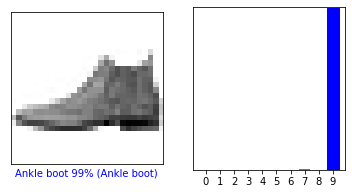

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

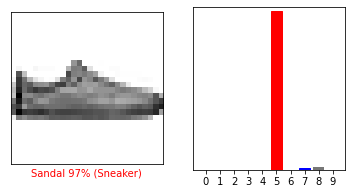

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

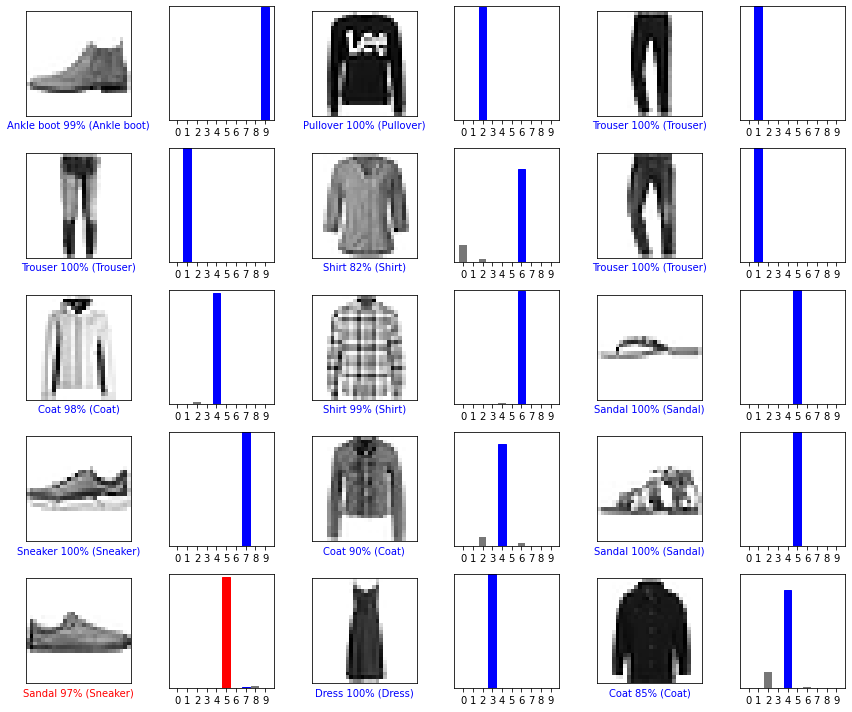

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.9163108e-05 7.2068375e-14 9.9900764e-01 1.8123520e-09 8.1888458e-04
  4.9270381e-13 1.4437248e-04 5.5026169e-19 3.3279272e-11 1.1571502e-16]]


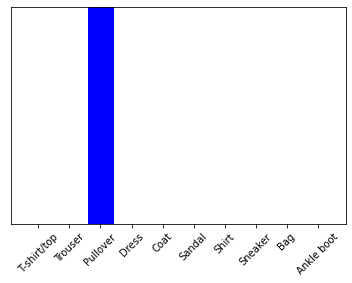

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.